In [26]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn import tree


from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [2]:
dtrain =pd.read_csv("D:/ml/xgboost-main/data/android_malware/TUANDROMD.csv")
dtrain.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [3]:
dtrain = dtrain.fillna(0)       #zamiana null na 0
dtrain.dtypes

ACCESS_ALL_DOWNLOADS                                        float64
ACCESS_CACHE_FILESYSTEM                                     float64
ACCESS_CHECKIN_PROPERTIES                                   float64
ACCESS_COARSE_LOCATION                                      float64
ACCESS_COARSE_UPDATES                                       float64
                                                             ...   
Landroid/telephony/TelephonyManager;->getSimOperatorName    float64
Landroid/telephony/TelephonyManager;->getSimCountryIso      float64
Landroid/telephony/TelephonyManager;->getSimSerialNumber    float64
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    float64
Label                                                        object
Length: 242, dtype: object

In [4]:
label = {'malware':1,'goodware':0}      #zamina tekstu w excel na wartosci 0 i 1
dtrain2 = dtrain.replace(label)
dtrain2[dtrain2.select_dtypes(include=['float64']).columns] = dtrain2.select_dtypes(include=['float64']).astype('int64')
dtrain2.dtypes

ACCESS_ALL_DOWNLOADS                                        int64
ACCESS_CACHE_FILESYSTEM                                     int64
ACCESS_CHECKIN_PROPERTIES                                   int64
ACCESS_COARSE_LOCATION                                      int64
ACCESS_COARSE_UPDATES                                       int64
                                                            ...  
Landroid/telephony/TelephonyManager;->getSimOperatorName    int64
Landroid/telephony/TelephonyManager;->getSimCountryIso      int64
Landroid/telephony/TelephonyManager;->getSimSerialNumber    int64
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    int64
Label                                                       int64
Length: 242, dtype: object

In [5]:
#stworzenie tabeli stanow oraz tabeli wyjsc
y1 = dtrain2['Label']
X1 = dtrain2.drop(columns=['Label'])

print(y1.head())
print(X1.head())

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     0                        0                          0   
3                     0                        0                          0   
4                     0                        0                          0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                       0                      0                     0   
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   

   ACCESS_LOCATION_

<Axes: xlabel='Label'>

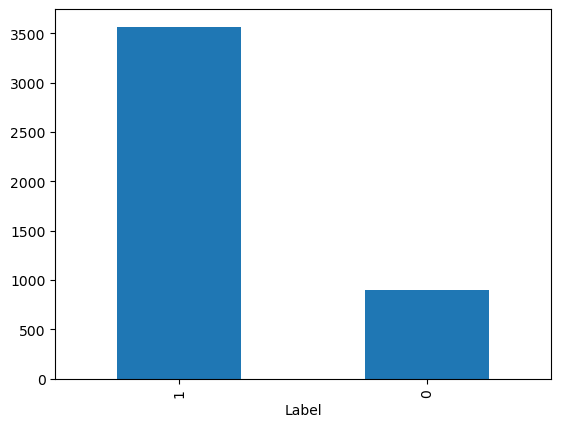

In [6]:
#plt.plot(y1)
pd.Series(y1).value_counts().plot.bar()     #ilosc 1 i 0 klasyfikujacych

In [7]:
#podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(3572, 241)
(893, 241)


**SMOTE**

<Axes: xlabel='Label'>

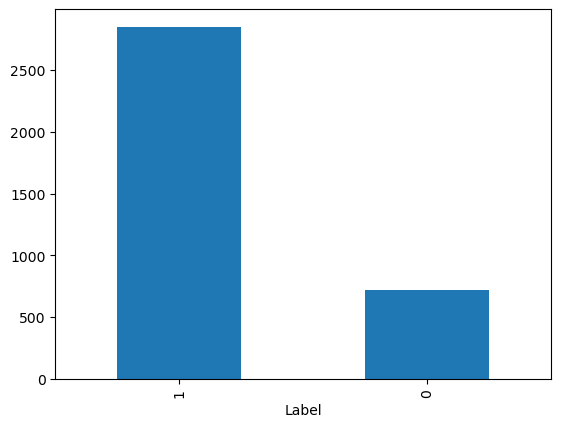

In [8]:
pd.Series(y_train).value_counts().plot.bar()    

<Axes: xlabel='Label'>

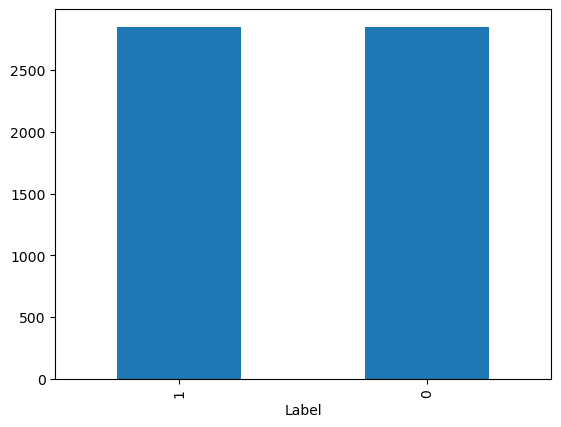

In [22]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
pd.Series(y_train_sm).value_counts().plot.bar()    

In [23]:
model_LR = LogisticRegression()                         #LR dla nie zbalansowanych         
model_LR_SMOTE = LogisticRegression()                   #LR dla zbalansowanych
model_RF = RandomForestClassifier()                     #random forest dla nie zbalansowanych
model_RF_SMOTE = RandomForestClassifier()               #random forest dla zbalansowanych
model_DT = DecisionTreeClassifier()                     #decision tree dla nie zbalansowanych
model_DT_SMOTE = DecisionTreeClassifier()               #decision tree dla zbalansowanych


model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm,y_train_sm)
model_RF.fit(X_train,y_train)
model_RF_SMOTE.fit(X_train_sm,y_train_sm)
model_DT.fit(X_train,y_train)
model_DT_SMOTE.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

## Markery:
Accuracy – Accuracy jest użyteczna, gdy klasy są zrównoważone. W przypadku niezrównoważonych danych może być jednak myląca, ponieważ model może osiągnąć wysoką dokładność, pomijając mniejszościowe klasy.

Recall –  Wysoki recall oznacza, że model dobrze wykrywa wszystkie rzeczywiste pozytywne przypadki i rzadko pomija rzeczywiste przypadki pozytywne.

Precision – Wysoka precyzja oznacza, że model rzadko daje fałszywe alarmy (czyli błędnie klasyfikuje negatywne przypadki jako pozytywne).

F1 score - F1-score jest wysoki, gdy zarówno precision, jak i recall są wysokie. Jest to dobra metryka, gdy ważne jest, aby balansować dokładność z wykrywalnością pozytywnych przypadków.

Micro avg - Micro average traktuje wszystkie klasy tak samo i jest odpowiednia, gdy chcesz dać taki sam priorytet każdemu przypadkowi, bez względu na jego klasę.

Weighted avg - Weighted average jest przydatna, gdy dane są niezrównoważone, ponieważ uwzględnia liczbę przypadków każdej klasy. Daje lepsze ogólne zrozumienie wydajności modelu na zestawach danych z nierównomiernym rozkładem klas.


In [24]:
#LR
y_pred_LR = model_LR.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR_SMOTE))

#RF
y_pred_RF = model_RF.predict(X_test)
print('RF dla nie zbalansowanych\n', classification_report(y_test, y_pred_RF))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print('RF dla zbalansowanych\n', classification_report(y_test, y_pred_RF_SMOTE))

#DT
y_pred_DT = model_DT.predict(X_test)
print('DT dla nie zbalansowanych\n', classification_report(y_test, y_pred_DT))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print('DT dla zbalansowanych\n', classification_report(y_test, y_pred_DT_SMOTE))

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       179
           1       0.98      0.99      0.99       714

    accuracy                           0.98       893
   macro avg       0.97      0.96      0.96       893
weighted avg       0.98      0.98      0.98       893

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       179
           1       0.99      0.98      0.99       714

    accuracy                           0.98       893
   macro avg       0.97      0.98      0.97       893
weighted avg       0.98      0.98      0.98       893

RF dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       179
           1       0.99      1.00      1.00       714

    accuracy                           0.99       893
   macro avg       0.99      0.98      0.99    

## Drzewa decyzyjne

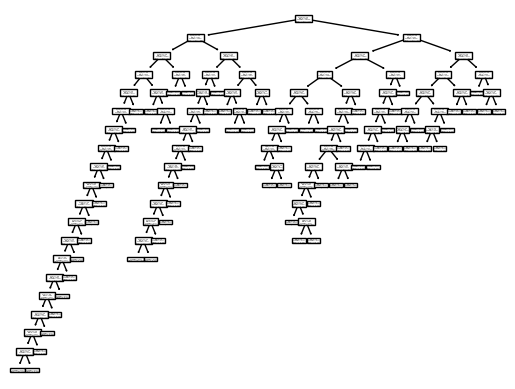

|--- feature_149 <= 0.50
|   |--- feature_216 <= 0.50
|   |   |--- feature_209 <= 0.50
|   |   |   |--- feature_98 <= 0.50
|   |   |   |   |--- feature_240 <= 0.50
|   |   |   |   |   |--- feature_215 <= 0.50
|   |   |   |   |   |   |--- feature_200 <= 0.50
|   |   |   |   |   |   |   |--- feature_214 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_190 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_125 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_138 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_138 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_125 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_190 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_214 >  0.50
|   |   |   |   |   |   |   |  

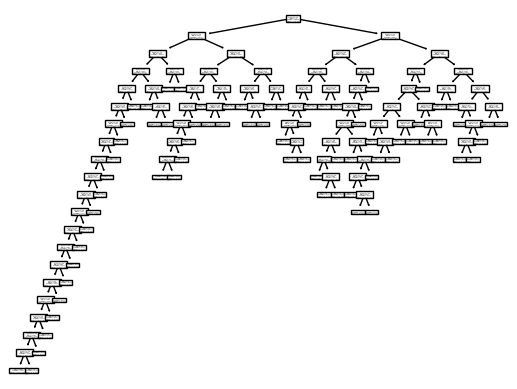

|--- feature_149 <= 0.50
|   |--- feature_216 <= 0.50
|   |   |--- feature_209 <= 0.50
|   |   |   |--- feature_98 <= 0.50
|   |   |   |   |--- feature_232 <= 0.50
|   |   |   |   |   |--- feature_215 <= 0.50
|   |   |   |   |   |   |--- feature_200 <= 0.50
|   |   |   |   |   |   |   |--- feature_214 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_190 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_125 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_138 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_138 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_125 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_190 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_214 >  0.50
|   |   |   |   |   |   |   | 

In [30]:
tree.plot_tree(model_DT, proportion=True)
tree_text = tree.export_text(model_DT)
plt.show()
print(tree_text)
tree.plot_tree(model_DT_SMOTE, proportion=True)
tree_text2 = tree.export_text(model_DT_SMOTE)
plt.show()
print(tree_text2)
